In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Task 1 : Import the dataset
file_path = r"F:\Data_Science_Jupyter_Files\medical_insurance_dataset.csv"

In [6]:
df = pd.read_csv(file_path, header=None)

In [7]:
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [14]:
# Add the headers to the dataframe
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]

In [9]:
df.columns = headers

In [12]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [15]:
# Now, replace the '?' entries with 'NaN' values.
df.replace("?", np.nan, inplace=True)

In [16]:
# Task 2 : Data Wrangling

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [24]:
missing_data = df.isnull()
missing_data.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [25]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

age
False    2768
True        4
Name: count, dtype: int64

gender
False    2772
Name: count, dtype: int64

bmi
False    2772
Name: count, dtype: int64

no_of_children
False    2772
Name: count, dtype: int64

smoker
False    2765
True        7
Name: count, dtype: int64

region
False    2772
Name: count, dtype: int64

charges
False    2772
Name: count, dtype: int64



In [29]:
# age is a continuous variable, replace with mean age
mean_age = df["age"].astype("float").mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# Update data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


C:\Users\HP\AppData\Local\Temp\ipykernel_13304\3937304326.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].replace(np.nan, mean_age, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13304\3937304326.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [36]:
# Update the charges column such that all values are rounded to nearest 2 decimal places
df["charges"] = np.round(df[["charges"]], 2)

In [35]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


In [37]:
# Task 3 : Exploratory Data Analysis (EDA)

(0.0, 66902.85800000001)

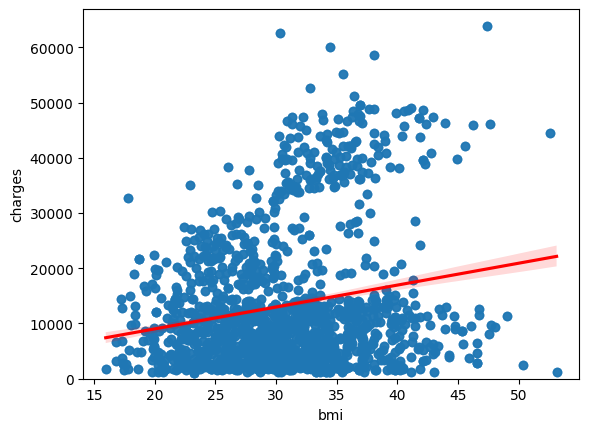

In [44]:
# Implement the regression plot for charges with respect to bmi
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color":"red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

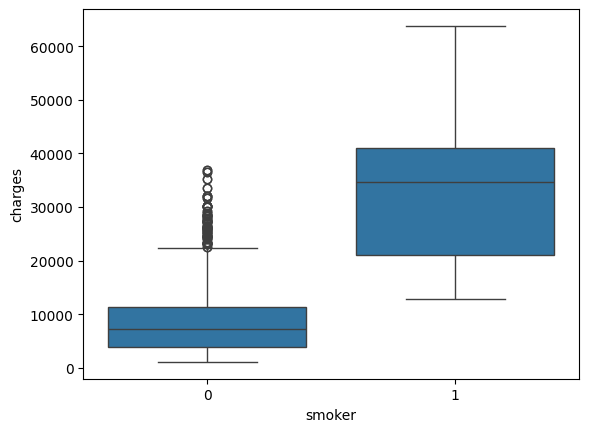

In [45]:
# Implement the box plot for charges with respect to smoker
sns.boxplot(x="smoker", y="charges", data=df)

In [46]:
# Print the correlation matrix for the dataset.
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [47]:
# Task 4 : Model Development

In [48]:
X = df[["smoker"]]

In [49]:
Y = df["charges"]

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X,Y)

LinearRegression()

In [52]:
lm.score(X,Y)

0.6221791733924185

In [62]:
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
lm.score(Z,Y)

0.7504083820289634

In [64]:
# Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance
Input = [("Scale", StandardScaler()),
        ("Polynomial", PolynomialFeatures(include_bias=False)),
        ("model", LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype("float")
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452576213500093


In [65]:
# Task 5 : Model Refinement

In [66]:
# Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.20, random_state=1)

In [68]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6760807731582404


In [70]:
# Apply polynomial transformation to the training parameters with degree=2
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.7835631107608146
